In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('covid.train.csv')
df

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,work_outside_home.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,anxious.4,depressed.4,worried_finances.4,tested_positive.4
0,0,0,0,0,0,0,0,0,1,0,...,31.113209,67.394551,36.674291,40.743132,17.842221,4.093712,10.440071,8.627117,37.329512,7.456154
1,1,0,0,0,0,0,1,0,0,0,...,33.920257,64.398380,34.612238,44.035688,17.808103,4.924935,10.172662,9.954333,32.508881,8.010957
2,2,0,0,0,0,0,0,0,0,0,...,31.604604,62.101064,26.521875,36.746453,13.903667,7.313833,10.388712,7.956139,36.745588,2.906977
3,3,0,0,0,0,0,0,0,0,0,...,35.115738,67.935520,38.022492,48.434809,27.134876,3.101904,10.498683,8.231522,38.680162,12.575816
4,4,0,0,0,0,0,0,0,0,0,...,35.129714,69.934592,38.242368,49.095933,22.683709,4.594620,9.878927,9.469290,28.344123,21.428589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,2695,0,0,0,0,0,0,0,0,0,...,39.209278,65.815096,37.046827,46.777637,21.952499,2.724187,14.658436,11.099308,33.154910,13.437482
2695,2696,0,0,0,0,0,0,0,0,0,...,28.984491,66.126427,31.299807,40.399527,16.783327,14.058799,13.129031,10.492896,36.670282,5.040143
2696,2697,0,0,0,1,0,0,0,0,0,...,34.346100,63.456270,30.829009,41.828908,20.597714,2.391852,16.940896,12.888275,42.452451,13.618256
2697,2698,0,0,0,0,0,0,0,0,0,...,30.451071,67.477177,33.975333,45.837535,18.437260,3.088666,12.621144,10.096939,29.668802,9.512585


In [6]:
best_corr = df.corr()['tested_positive.4'].sort_values(ascending=False)[df.corr()['tested_positive.4'].sort_values(ascending=False)>0.5].index[1:]
idx = 0
res_list = []
for i in x.columns:
    if i in best_corr:
        res_list.append(idx)
    idx = idx+1
print(best_corr)
print(res_list)

Index(['tested_positive.3', 'tested_positive.2', 'tested_positive.1',
       'tested_positive', 'hh_cmnty_cli.4', 'hh_cmnty_cli.3',
       'nohh_cmnty_cli.4', 'hh_cmnty_cli.2', 'nohh_cmnty_cli.3',
       'hh_cmnty_cli.1', 'nohh_cmnty_cli.2', 'hh_cmnty_cli',
       'nohh_cmnty_cli.1', 'nohh_cmnty_cli', 'ili.4', 'cli.4', 'ili.3',
       'cli.3', 'ili.2', 'cli.2', 'ili.1', 'cli.1', 'ili', 'cli', 'anxious.4',
       'anxious.3', 'anxious.2', 'anxious.1', 'anxious', 'work_outside_home.4',
       'work_outside_home.3', 'work_outside_home.2', 'work_outside_home.1',
       'work_outside_home'],
      dtype='object')
[38, 39, 40, 41, 44, 50, 53, 54, 55, 56, 57, 60, 66, 69, 70, 71, 72, 73, 76, 82, 85, 86, 87, 88, 89, 92, 98, 101, 102, 103, 104, 105, 108, 114]


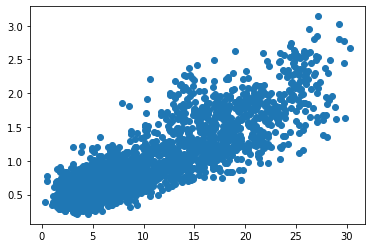

In [7]:
plt.scatter(df['tested_positive.4'],df['cli'])

In [22]:
error_state = []
for col in best_corr:
    rmse = np.sqrt((df['tested_positive.4']-df[col])**2)
    mi = rmse.mean()-3*rmse.std()
    mx = rmse.mean()+3*rmse.std()
    error_index = rmse[(rmse>mx)|(rmse<mi)].index
    error_state_col = df[df.index.isin(error_index)].iloc[:,:38].sum()
    
    error_state.append(error_state_col[error_state_col>0])
print(error_state)


[id    60906
AL        1
AK        1
AR        1
CO        2
ID        5
IA        2
KS        1
KY        2
LA        2
MS        2
MO        3
NE        9
NV        5
NM        4
OK        1
OR        2
dtype: int64, id    65190
AL        1
AK        2
CO        1
ID        5
IA        4
KS        1
KY        1
LA        2
MS        6
MO        1
NE       14
NV        6
NM        2
OR        4
dtype: int64, id    49040
AK        3
AR        1
ID        2
IA        2
KS        1
LA        2
MS        6
MO        4
NE       12
NV        4
NM        4
OK        1
OR        2
UT        1
dtype: int64, id    48741
AL        1
AK        3
ID        1
IA        2
LA        1
MS        4
MO        5
NE       12
NV        7
NM        3
OK        4
OR        3
dtype: int64, id    80632
AK       38
AR        4
ID        5
OK        3
dtype: int64, id    90722
AK       40
AR        4
ID        5
OK        5
dtype: int64, id    106440
AK        48
AR         4
ID         6
KS         2
OK        

In [25]:
pd.DataFrame(error_state).fillna(0).sum().sort_values(ascending=False)

id    1627331.0
AK        449.0
MS         91.0
AR         67.0
IA         67.0
OK         65.0
ID         65.0
NE         64.0
AL         35.0
NV         22.0
NM         13.0
MO         13.0
OR         11.0
KS          8.0
LA          7.0
CO          3.0
KY          3.0
UT          2.0
RI          2.0
dtype: float64

In [76]:
def corrb(df,y='tested_positive.4'):
    state_best_corr = {}
    for state in df.columns[:38]:
        state_corr = df[df[state]==1].iloc[:38].corr()[y].drop(y)
        state_best_corr[state] = state_corr[abs(state_corr)>0.8].sort_values(ascending=False)
    return state_best_corr

In [77]:
pd.DataFrame(corrb(df))

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,NC,OH,OK,OR,RI,SC,TX,UT,VA,WA
anxious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxious.1,NaN,NaN,NaN,NaN,0.800227,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxious.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxious.3,NaN,NaN,NaN,NaN,0.804656,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anxious.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cli.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.855261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cli.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.881831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh_cmnty_cli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.843131,NaN
hh_cmnty_cli.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860984,NaN
hh_cmnty_cli.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881453,NaN


In [78]:
print(df.shape)

(2699, 118)


In [80]:
col_corr_count = pd.DataFrame(corrb(df)).apply(lambda x:x.count(),axis=1).sort_values(ascending=False)
reslist = col_corr_count[col_corr_count>8]
print(reslist)
print(len(reslist))
ans_list = []
print(reslist.index)

tested_positive.3    30
tested_positive.2    12
dtype: int64
2
Index(['tested_positive.3', 'tested_positive.2'], dtype='object')
